In [6]:
import pandas as pd

#Aquí cargamos el CSV de la BBDD obtenida para empezar a trabajar con ellos.

# Cargar el archivo CSV
data = pd.read_csv(r"C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\EDA_Pronosticos\SRC\data\SP1.csv")
# Ver las primeras filas del dataset
data.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,SP1,15/08/2024,18:00,Ath Bilbao,Getafe,1,1,D,1,0,...,2.08,1.73,2.17,1.76,2.19,1.82,2.12,1.77,2.19,1.82
1,SP1,15/08/2024,20:30,Betis,Girona,1,1,D,1,0,...,2.01,1.89,2.03,1.89,2.10,1.94,2.01,1.85,2.08,1.90
2,SP1,16/08/2024,18:00,Celta,Alaves,2,1,H,0,1,...,1.82,2.11,1.83,2.10,1.84,2.12,1.79,2.08,1.85,2.14
3,SP1,16/08/2024,20:30,Las Palmas,Sevilla,2,2,D,1,1,...,1.86,2.07,1.87,2.07,1.89,2.11,1.86,2.03,1.90,2.09
4,SP1,17/08/2024,18:00,Osasuna,Leganes,1,1,D,0,1,...,1.88,2.05,1.88,2.04,1.91,2.06,1.87,2.00,1.94,2.05


Revisión de valores faltantes: Comprobar si hay valores nulos y cómo manejarlos (rellenarlos, eliminarlos, etc.).
Formato y consistencia de los datos: Revisar que los datos estén en el formato correcto (por ejemplo, fechas, categorías y números).
Eliminación de duplicados: Asegurarse de que no haya registros duplicados innecesarios.

In [20]:
#Realizamos una revisión de las columnas y los valores faltantes.

# Verificar valores faltantes
data.isnull().sum()
data.info()
# Verificar si hay duplicados
data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 119 entries, Div to BFECAHA
dtypes: float64(96), int64(16), object(7)
memory usage: 147.9+ KB


np.int64(0)

In [11]:
#Imprimimos las columnas para ver la relación y generar los códigos.
print(data.columns)

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=119)



¿El equipo local gana más veces que el visitante? Podemos comparar los goles marcados y recibidos para equipos locales vs visitantes.
¿Hay patrones de desempeño estacionales o a lo largo de la temporada? Analizar las victorias y derrotas en función de la fecha o las semanas de la temporada.

In [10]:
# Analizar si el equipo local gana más que el visitante
local_wins = data[data['FTHG'] > data['FTAG']]
away_wins = data[data['FTHG'] < data['FTAG']]

print(f"Victorias del equipo local: {local_wins.shape[0]}")
print(f"Victorias del equipo visitante: {away_wins.shape[0]}")



Victorias del equipo local: 75
Victorias del equipo visitante: 44




Distribuciones de goles marcados, recibidos, victorias, empates, etc.
Análisis de correlación entre variables.
Comparar los equipos locales y visitantes en cuanto a su rendimiento.

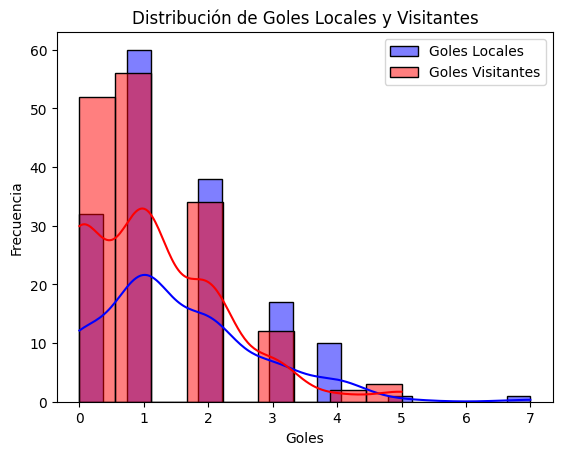

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv(r"C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\EDA_Pronosticos\SRC\data\SP1.csv")

# Histograma de goles
sns.histplot(data['FTHG'], kde=True, color='blue', label='Goles Locales')
sns.histplot(data['FTAG'], kde=True, color='red', label='Goles Visitantes')

plt.legend()
plt.title('Distribución de Goles Locales y Visitantes')
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.show()


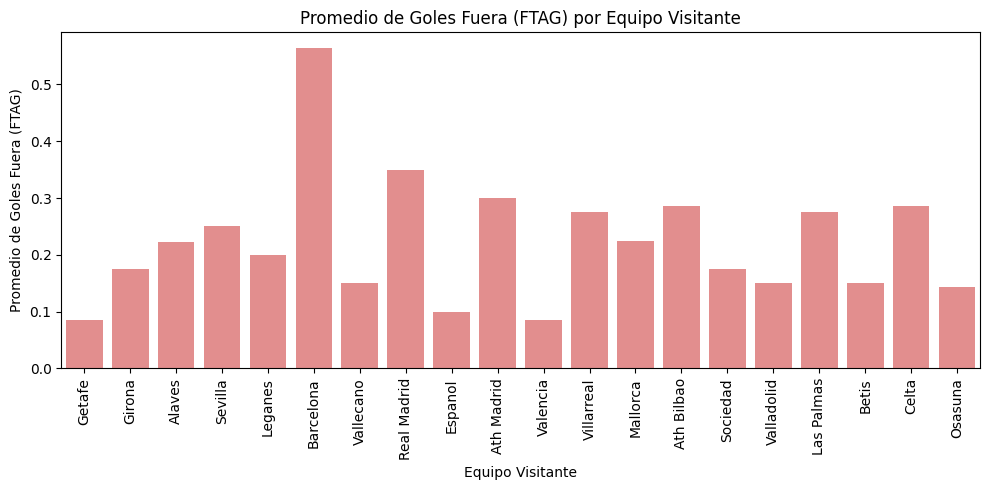

In [67]:
# Configurar la figura 
plt.figure(figsize=(10, 5))

# Usar un color específico en lugar de palette
sns.barplot(x='AwayTeam', y='FTAG', data=data, color='lightcoral', errorbar=None)

# Títulos y etiquetas
plt.title('Promedio de Goles Fuera (FTAG) por Equipo Visitante')
plt.xlabel('Equipo Visitante')
plt.ylabel('Promedio de Goles Fuera (FTAG)')

# Rota los nombres de los equipos para mejor legibilidad
plt.xticks(rotation=90)

# Ajuste del diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



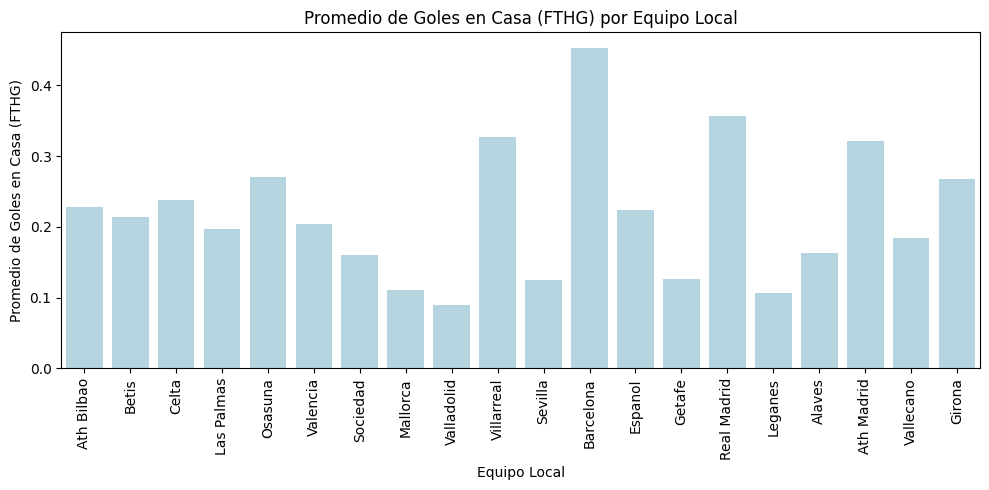

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la figura
plt.figure(figsize=(10, 5))

# Usar un color simple en lugar de palette
sns.barplot(x='HomeTeam', y='FTHG', data=data, color='lightblue', errorbar=None)

# Títulos y etiquetas
plt.title('Promedio de Goles en Casa (FTHG) por Equipo Local')
plt.xlabel('Equipo Local')
plt.ylabel('Promedio de Goles en Casa (FTHG)')

# Rota los nombres de los equipos para mejor legibilidad
plt.xticks(rotation=90)

# Ajuste del diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


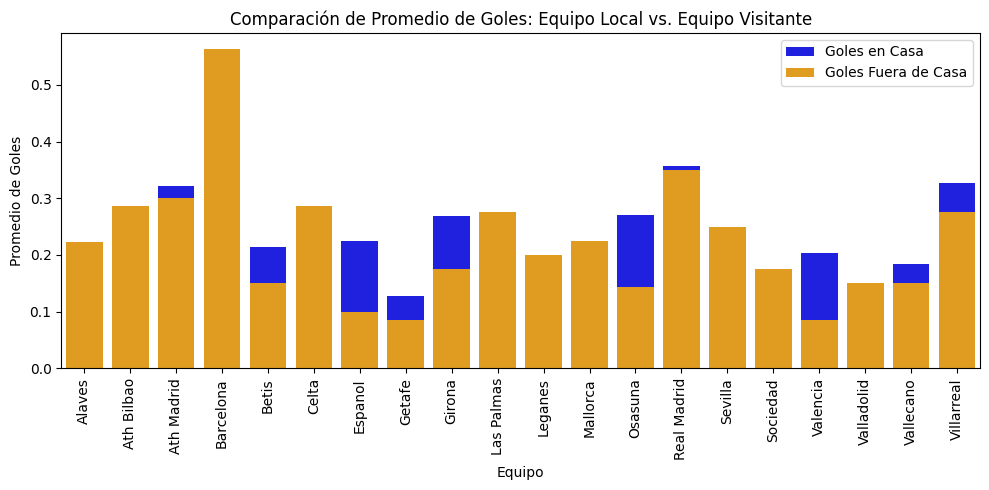

In [69]:
# Calcular el promedio de goles en casa (FTHG) para todos los equipos locales
promedio_goles_locales = data.groupby('HomeTeam')['FTHG'].mean().reset_index()

# Calcular el promedio de goles fuera de casa (FTAG) para todos los equipos visitantes
promedio_goles_visitantes = data.groupby('AwayTeam')['FTAG'].mean().reset_index()

# Renombrar las columnas para mejor claridad
promedio_goles_locales.rename(columns={'FTHG': 'Promedio Goles en Casa'}, inplace=True)
promedio_goles_visitantes.rename(columns={'FTAG': 'Promedio Goles Fuera de Casa'}, inplace=True)

# Fusionar ambos DataFrames para poder comparar los valores de goles en casa y fuera
df_comparativo = pd.merge(promedio_goles_locales, promedio_goles_visitantes, 
                          left_on='HomeTeam', right_on='AwayTeam', 
                          suffixes=('_local', '_visitante'))

# Crear un gráfico de barras para comparar los goles en casa y fuera de casa
plt.figure(figsize=(10, 5))

# Barras para goles en casa (locales)
sns.barplot(x='HomeTeam', y='Promedio Goles en Casa', data=df_comparativo, color='blue', label='Goles en Casa')
# Barras para goles fuera de casa (visitantes)
sns.barplot(x='HomeTeam', y='Promedio Goles Fuera de Casa', data=df_comparativo, color='orange', label='Goles Fuera de Casa')

# Ajustar la apariencia
plt.title('Comparación de Promedio de Goles: Equipo Local vs. Equipo Visitante')
plt.xlabel('Equipo')
plt.ylabel('Promedio de Goles')
plt.xticks(rotation=90)  # Rota las etiquetas de los equipos para mejor legibilidad
plt.legend()
plt.tight_layout()
plt.show()



In [87]:
data = pd.read_csv(r"C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\EDA_Pronosticos\SRC\data\SP1.csv")

EquipoConMásGoles
Real Madrid        2
Valencia           1
Juventus           1
Empate en goles    1
Name: count, dtype: int64


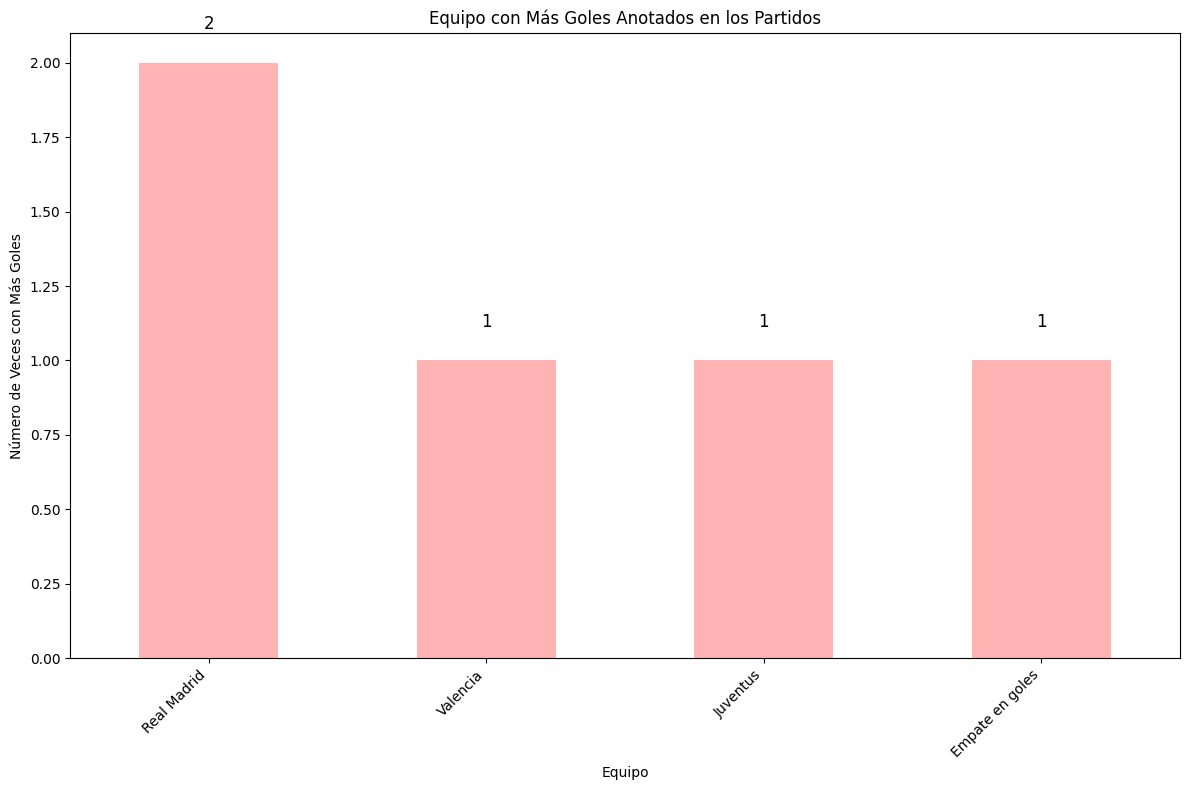

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo de DataFrame con datos ficticios (sustituir con tus datos reales)
data = {
    'HomeTeam': ['Real Madrid', 'Barcelona', 'Juventus', 'Real Madrid', 'Barcelona'],
    'AwayTeam': ['Atletico', 'Valencia', 'AC Milan', 'Bayern', 'Real Madrid'],
    'FTHG': [2, 1, 3, 0, 2],  # Goles del equipo local
    'FTAG': [1, 2, 1, 0, 3]   # Goles del equipo visitante
}
df = pd.DataFrame(data)

# Función para determinar qué equipo anotó más goles en cada partido
def equipo_con_mas_goles(row):
    if row['FTHG'] > row['FTAG']:  # Si el equipo local anotó más goles
        return row['HomeTeam']
    elif row['FTHG'] < row['FTAG']:  # Si el equipo visitante anotó más goles
        return row['AwayTeam']
    else:
        return 'Empate en goles'  # En caso de empate de goles

# Aplicar la función para determinar qué equipo anotó más goles en cada partido
df['EquipoConMásGoles'] = df.apply(equipo_con_mas_goles, axis=1)

# Contar cuántas veces cada equipo ha anotado más goles
equipos_con_mas_goles = df['EquipoConMásGoles'].value_counts()

# Mostrar el resultado
print(equipos_con_mas_goles)

# Crear el gráfico de barras para mostrar el equipo con más goles
plt.figure(figsize=(12, 8))

# Usamos 'equipos_con_mas_goles.index' para que los nombres de los equipos se muestren correctamente
ax = equipos_con_mas_goles.plot(kind='bar', color='#ffb3b3')

# Añadir los nombres de los equipos sobre las barras
for i, value in enumerate(equipos_con_mas_goles):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)  # Ajuste según el valor

# Títulos y etiquetas
plt.title('Equipo con Más Goles Anotados en los Partidos')
plt.xlabel('Equipo')
plt.ylabel('Número de Veces con Más Goles')

# Ajustar las etiquetas de los equipos en el eje X (rotarlas para mejor legibilidad)
plt.xticks(rotation=45, ha='right')

# Ajuste del diseño para que se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()







EquipoConMásGoles
Real Madrid        2
Valencia           1
Juventus           1
Empate en goles    1
Name: count, dtype: int64


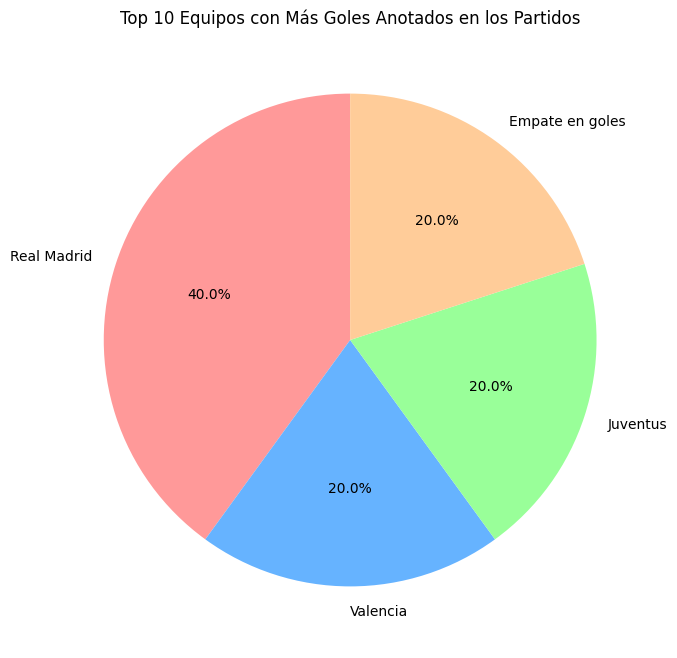

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


# Función para determinar qué equipo anotó más goles en cada partido
def equipo_con_mas_goles(row):
    if row['FTHG'] > row['FTAG']:  # Si el equipo local anotó más goles
        return row['HomeTeam']
    elif row['FTHG'] < row['FTAG']:  # Si el equipo visitante anotó más goles
        return row['AwayTeam']
    else:
        return 'Empate en goles'  # En caso de empate de goles

# Aplicar la función para determinar qué equipo anotó más goles en cada partido
df['EquipoConMásGoles'] = df.apply(equipo_con_mas_goles, axis=1)

# Contar cuántas veces cada equipo ha anotado más goles
equipos_con_mas_goles = df['EquipoConMásGoles'].value_counts()

# Filtrar el Top 10 equipos con más goles anotados
top_10_equipos_con_mas_goles = equipos_con_mas_goles.head(10)

# Mostrar el resultado
print(top_10_equipos_con_mas_goles)

# Crear el gráfico de pastel para mostrar el Top 10 de equipos con más goles
plt.figure(figsize=(8, 8))
top_10_equipos_con_mas_goles.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3b3', '#c2f0c2', '#f9c2c2', '#b3d9ff', '#ffb342'])
plt.title('Top 10 Equipos con Más Goles Anotados en los Partidos')
plt.ylabel('')  # Eliminar la etiqueta del eje Y
plt.show()


In [19]:
#Imprimimos las columnas para ver la relación y generar los códigos.
print(data.columns)

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=119)


Este gráfico te dará una idea de cómo se distribuyen los goles entre los equipos locales y visitantes. Si prefieres realizar otro tipo de análisis, como ver la distribución de goles o cómo se distribuyen los resultados (por ejemplo, victorias y derrotas), también podemos hacer gráficos basados en esas columnas.


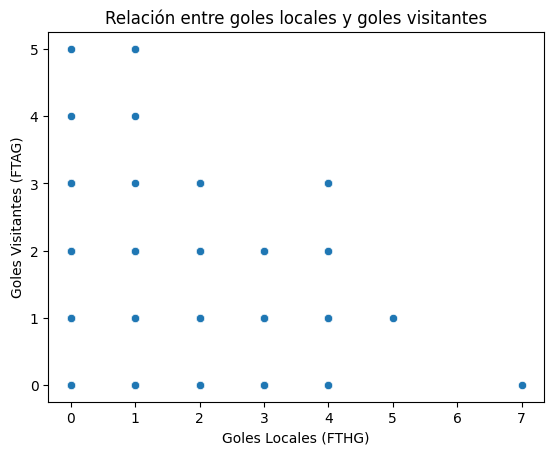

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica si las columnas 'FTHG' y 'FTAG' están disponibles
sns.scatterplot(x=data['FTHG'], y=data['FTAG'])
plt.title('Relación entre goles locales y goles visitantes')
plt.xlabel('Goles Locales (FTHG)')
plt.ylabel('Goles Visitantes (FTAG)')
plt.show()



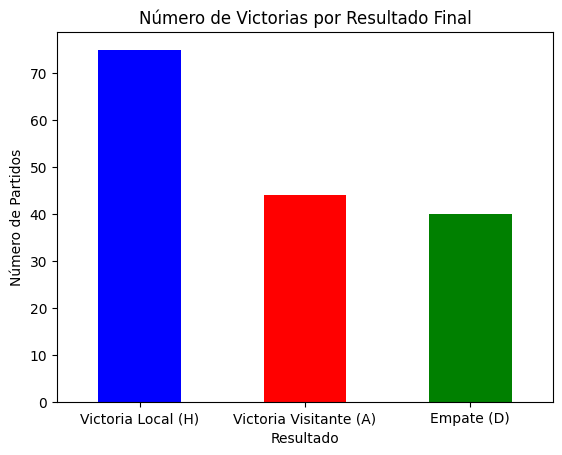

FTR
H    75
A    44
D    40
Name: count, dtype: int64


In [25]:
#Podemos analizar cuántas veces el equipo local gana (y cuántas veces el visitante gana), basándonos en la columna 'FTR', que indica el resultado final del partido:
# Contar el número de victorias locales y visitantes
victories = data['FTR'].value_counts()
victories.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Número de Victorias por Resultado Final')
plt.xlabel('Resultado')
plt.ylabel('Número de Partidos')
plt.xticks(ticks=[0, 1, 2], labels=['Victoria Local (H)', 'Victoria Visitante (A)', 'Empate (D)'], rotation=0)
plt.show()

# Imprimir las victorias para cada categoría
print(victories)


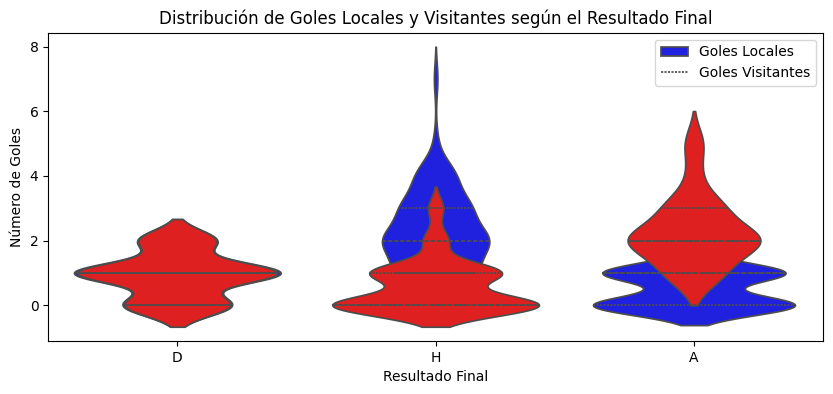

In [30]:
# Gráfico de violín para comparar los goles locales y visitantes en función del resultado final
plt.figure(figsize=(10, 4))
sns.violinplot(x=data['FTR'], y=data['FTHG'], color='blue', label='Goles Locales', inner='quart')
sns.violinplot(x=data['FTR'], y=data['FTAG'], color='red', label='Goles Visitantes', inner='quart')
plt.title('Distribución de Goles Locales y Visitantes según el Resultado Final')
plt.xlabel('Resultado Final')
plt.ylabel('Número de Goles')
plt.legend(labels=['Goles Locales', 'Goles Visitantes'])
plt.show()


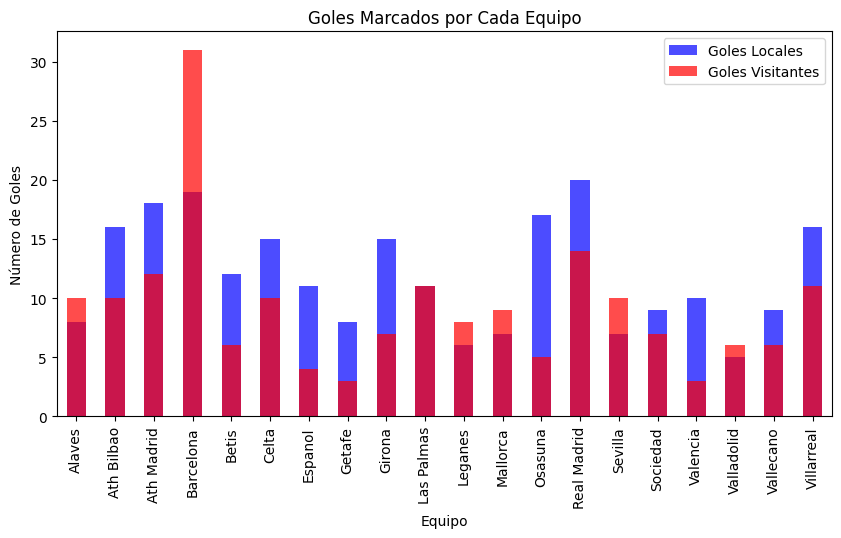

In [28]:
# Si quieres comparar los goles marcados por cada equipo, podemos agrupar los datos por equipos locales y visitantes, sumando los goles de cada uno.
# Sumar los goles por equipo (locales y visitantes)
home_goals = data.groupby('HomeTeam')['FTHG'].sum()
away_goals = data.groupby('AwayTeam')['FTAG'].sum()

# Crear un gráfico de barras para ver la cantidad de goles por equipo
plt.figure(figsize=(10, 5))
home_goals.plot(kind='bar', color='blue', alpha=0.7, label='Goles Locales')
away_goals.plot(kind='bar', color='red', alpha=0.7, label='Goles Visitantes')
plt.title('Goles Marcados por Cada Equipo')
plt.xlabel('Equipo')
plt.ylabel('Número de Goles')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [31]:
# Ver las primeras filas del dataset
print(data.head())

# Información general sobre el dataset: tipo de datos, número de columnas, filas
print(data.info())

# Descripción estadística de las columnas numéricas
print(data.describe())


   Div        Date   Time    HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  SP1  15/08/2024  18:00  Ath Bilbao   Getafe     1     1   D     1     0   
1  SP1  15/08/2024  20:30       Betis   Girona     1     1   D     1     0   
2  SP1  16/08/2024  18:00       Celta   Alaves     2     1   H     0     1   
3  SP1  16/08/2024  20:30  Las Palmas  Sevilla     2     2   D     1     1   
4  SP1  17/08/2024  18:00     Osasuna  Leganes     1     1   D     0     1   

   ... B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0  ...     2.08      1.73   2.17   1.76     2.19     1.82     2.12     1.77   
1  ...     2.01      1.89   2.03   1.89     2.10     1.94     2.01     1.85   
2  ...     1.82      2.11   1.83   2.10     1.84     2.12     1.79     2.08   
3  ...     1.86      2.07   1.87   2.07     1.89     2.11     1.86     2.03   
4  ...     1.88      2.05   1.88   2.04     1.91     2.06     1.87     2.00   

   BFECAHH  BFECAHA  
0     2.19     1.82  
1     2.08  

In [32]:
# Proporción de valores faltantes en cada columna (Missing Values)
missing_data = data.isnull().mean() * 100
print(missing_data)


Div         0.0
Date        0.0
Time        0.0
HomeTeam    0.0
AwayTeam    0.0
           ... 
MaxCAHA     0.0
AvgCAHH     0.0
AvgCAHA     0.0
BFECAHH     0.0
BFECAHA     0.0
Length: 119, dtype: float64


In [33]:
# Número de valores únicos por columna
unique_values = data.nunique()
print(unique_values)

# Comprobar el tipo de dato de cada columna
print(data.dtypes)


Div          1
Date        63
Time         8
HomeTeam    20
AwayTeam    20
            ..
MaxCAHA     42
AvgCAHH     38
AvgCAHA     38
BFECAHH     42
BFECAHA     42
Length: 119, dtype: int64
Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
BFECAHH     float64
BFECAHA     float64
Length: 119, dtype: object


Visualización de las Variables Categóricas
Ahora vamos a visualizar algunas de las variables categóricas para entender cómo están distribuidas.

C:\Users\angel\AppData\Local\Temp\ipykernel_15112\3724609268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='FTR', palette='Set1')


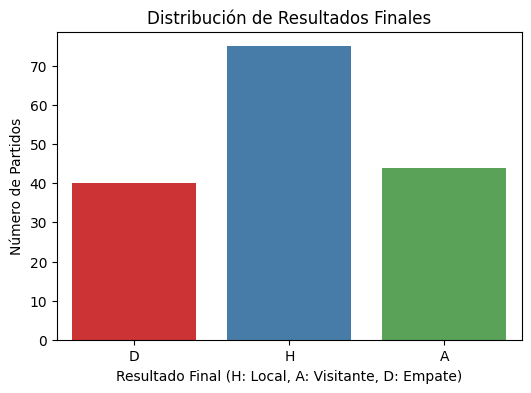

In [48]:
# Distribución de los resultados finales
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='FTR', palette='Set1')
plt.title('Distribución de Resultados Finales')
plt.xlabel('Resultado Final (H: Local, A: Visitante, D: Empate)')
plt.ylabel('Número de Partidos')
plt.show()


5. Conclusión sobre el Data Understanding
Este análisis inicial proporciona una visión general de cómo están distribuidos los datos, el tipo de las variables, los posibles valores faltantes y las características importantes que podrían influir en el análisis posterior. El siguiente paso será profundizar en cada una de estas variables y comenzar a explorar cómo se relacionan entre sí.

In [37]:
# Eliminar columnas innecesarias
columns_to_drop = ['Time', 'Date']  # Las columnas de fecha y hora pueden no ser necesarias
data.drop(columns=columns_to_drop, inplace=True)


3. Valores Faltantes (Missings)
Vamos a identificar y manejar los valores faltantes en las columnas del dataset.

Verificación de valores faltantes:

In [39]:
# Ver la proporción de valores faltantes en cada columna
missing_data = data.isnull().mean() * 100
print(missing_data)


Div         0.0
HomeTeam    0.0
AwayTeam    0.0
FTHG        0.0
FTAG        0.0
           ... 
MaxCAHA     0.0
AvgCAHH     0.0
AvgCAHA     0.0
BFECAHH     0.0
BFECAHA     0.0
Length: 117, dtype: float64


Tratamiento de los valores faltantes:
Dependiendo de la cantidad de valores faltantes, podemos decidir si eliminarlos o rellenarlos. Usaremos la media para las columnas numéricas (como goles) y la moda para las categóricas (como los nombres de los equipos).

In [50]:
# Imputar valores faltantes con la media
data['FTHG'] = data['FTHG'].fillna(data['FTHG'].mean())

# Imputar valores faltantes con la media
data['FTAG'] = data['FTAG'].fillna(data['FTAG'].mean())

# Imputar valores faltantes con la moda
data['HomeTeam'] = data['HomeTeam'].fillna(data['HomeTeam'].mode()[0])

# Imputar valores faltantes con la moda
data['AwayTeam'] = data['AwayTeam'].fillna(data['AwayTeam'].mode()[0])

# Imputar valores faltantes con la moda
data['Div'] = data['Div'].fillna(data['Div'].mode()[0])



4. Detección de Outliers
Los outliers pueden distorsionar el análisis, por lo que los identificaremos utilizando gráficos y estadísticas.

Histogramas y Diagrama de Caja para Goles Locales y Visitantes

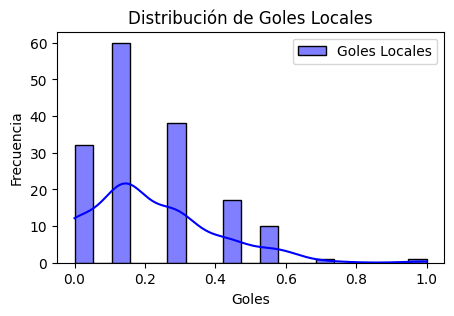

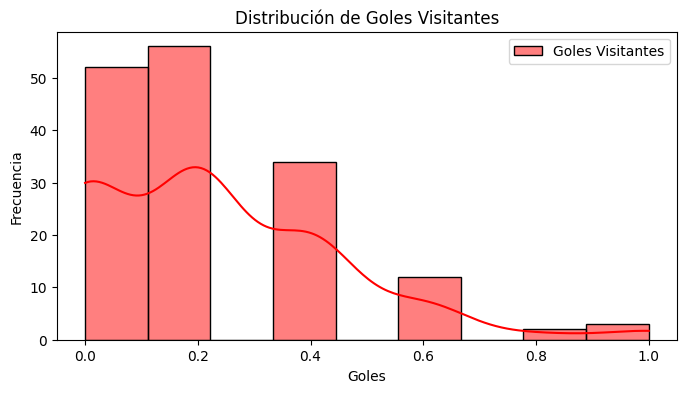

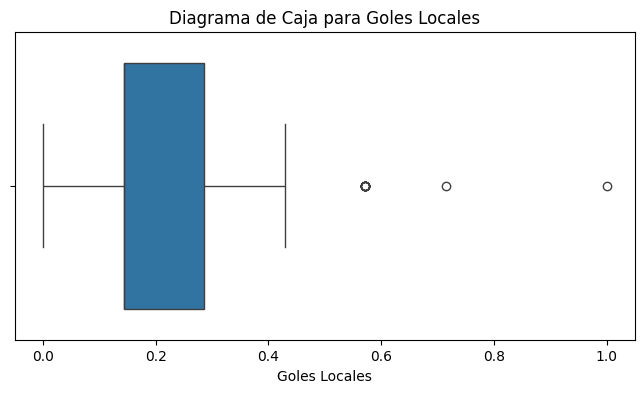

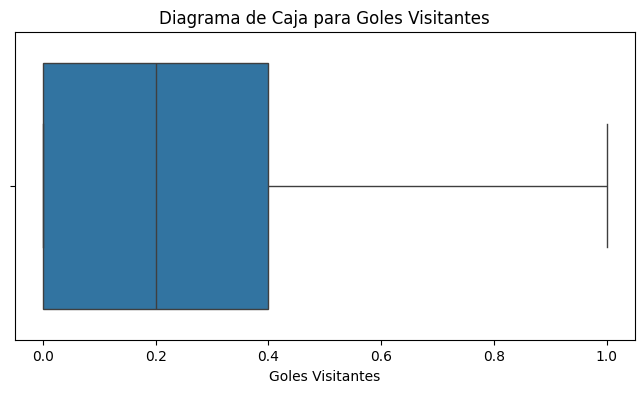

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de goles locales
plt.figure(figsize=(5, 3))
sns.histplot(data['FTHG'], kde=True, color='blue', label='Goles Locales')
plt.title('Distribución de Goles Locales')
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Histograma de goles visitantes
plt.figure(figsize=(8, 4))
sns.histplot(data['FTAG'], kde=True, color='red', label='Goles Visitantes')
plt.title('Distribución de Goles Visitantes')
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Diagrama de caja de goles locales
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['FTHG'])
plt.title('Diagrama de Caja para Goles Locales')
plt.xlabel('Goles Locales')
plt.show()

# Diagrama de caja de goles visitantes
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['FTAG'])
plt.title('Diagrama de Caja para Goles Visitantes')
plt.xlabel('Goles Visitantes')
plt.show()


Cuartiles, Rango, Mínimo y Máximo de Goles
python
Copiar código


In [42]:
# Cuartiles, rango, mínimo y máximo de los goles locales
goles_locales = data['FTHG']
q1 = goles_locales.quantile(0.25)
q3 = goles_locales.quantile(0.75)
iqr = q3 - q1
min_value = goles_locales.min()
max_value = goles_locales.max()

print(f"Cuartil 1: {q1}, Cuartil 3: {q3}, Rango Intercuartílico: {iqr}")
print(f"Valor mínimo: {min_value}, Valor máximo: {max_value}")


Cuartil 1: 1.0, Cuartil 3: 2.0, Rango Intercuartílico: 1.0
Valor mínimo: 0, Valor máximo: 7


5. Eliminar Duplicados
Eliminar registros duplicados para asegurar que los análisis no sean distorsionados por datos repetidos.

In [43]:
# Eliminar filas duplicadas
data.drop_duplicates(inplace=True)


6. Escalado de Datos
En el caso de que las variables tengan diferentes escalas (como goles y probabilidades de apuestas), podemos escalarlas para compararlas mejor. Usaremos el MinMaxScaler para este propósito.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Escalar las variables FTHG y FTAG
scaler = MinMaxScaler()
data[['FTHG', 'FTAG']] = scaler.fit_transform(data[['FTHG', 'FTAG']])


In [54]:
print(data.columns)


Index(['Div', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS',
       ...
       'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA', 'BFECAHH', 'BFECAHA'],
      dtype='object', length=117)


Análisis univariante: Descripción y visualización de la distribución de variables como FTHG (goles del equipo local) y FTAG (goles del equipo visitante).
Análisis bivariante: Relación entre goles locales y goles visitantes, y análisis de resultados finales.
Análisis multivariante: Análisis de la correlación entre múltiples variables y relaciones entre ellas mediante el heatmap y el pairplot.

4. Análisis Univariante
4.1 Estadísticos de Centralidad y Dispersión
Calcularemos los estadísticos básicos para las variables numéricas: media, mediana, moda, cuartiles, percentiles, varianza, desviación estándar, rango, mínimo y máximo

In [55]:
# Estadísticos de centralidad y dispersión
centralidad_disersion = data.describe().transpose()

# Calcular moda para las variables categóricas
moda = data.mode().iloc[0]

# Mostrar estadísticos de centralidad y dispersión
print(centralidad_disersion)
print("Moda de las variables:")
print(moda)


         count       mean       std   min        25%        50%        75%  \
FTHG     159.0   0.214735  0.175975  0.00   0.142857   0.142857   0.285714   
FTAG     159.0   0.230189  0.222970  0.00   0.000000   0.200000   0.400000   
HTHG     159.0   0.647799  0.780606  0.00   0.000000   1.000000   1.000000   
HTAG     159.0   0.465409  0.663515  0.00   0.000000   0.000000   1.000000   
HS       159.0  12.849057  5.101735  2.00  10.000000  12.000000  15.000000   
...        ...        ...       ...   ...        ...        ...        ...   
MaxCAHA  159.0   2.002516  0.107250  1.77   1.920000   2.000000   2.080000   
AvgCAHH  159.0   1.932830  0.094609  1.73   1.860000   1.930000   2.000000   
AvgCAHA  159.0   1.931887  0.094234  1.72   1.860000   1.940000   2.010000   
BFECAHH  159.0   1.989057  0.106038  1.72   1.910000   1.970000   2.065000   
BFECAHA  159.0   2.000377  0.106509  1.74   1.920000   2.010000   2.080000   

           max  
FTHG      1.00  
FTAG      1.00  
HTHG      4.

4.2 Gráficas Univariantes
Podemos graficar las distribuciones de las variables numéricas para observar su forma, dispersión y posibles sesgos.

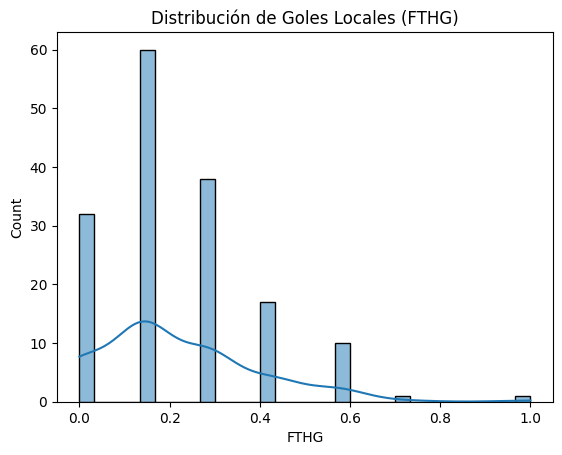

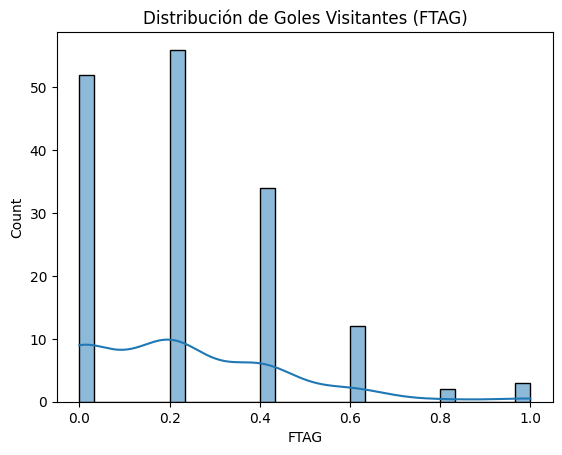

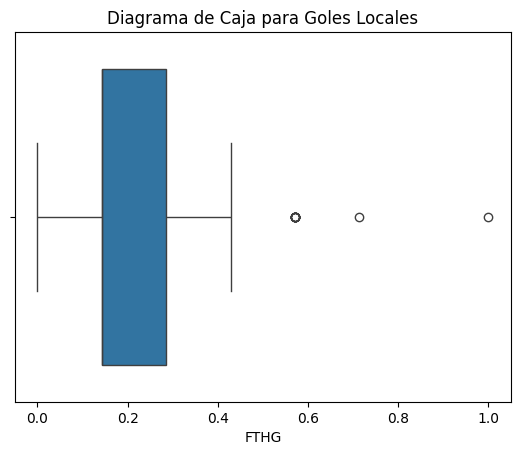

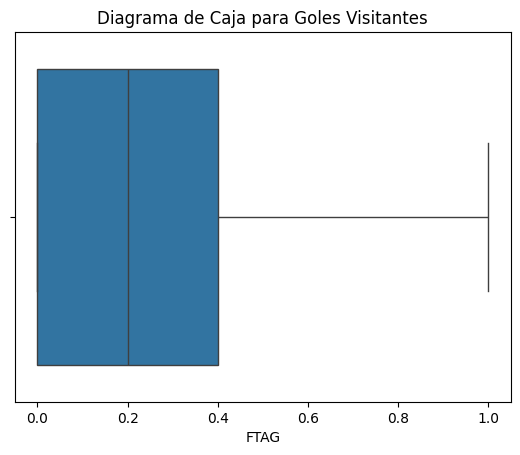

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma y gráfico de densidad para las variables numéricas
sns.histplot(data['FTHG'], kde=True, bins=30)
plt.title("Distribución de Goles Locales (FTHG)")
plt.show()

sns.histplot(data['FTAG'], kde=True, bins=30)
plt.title("Distribución de Goles Visitantes (FTAG)")
plt.show()

# Diagrama de caja
sns.boxplot(x=data['FTHG'])
plt.title("Diagrama de Caja para Goles Locales")
plt.show()

sns.boxplot(x=data['FTAG'])
plt.title("Diagrama de Caja para Goles Visitantes")
plt.show()


5. Análisis Bivariante
5.1 Agrupar y calcular estadísticos
Podemos agrupar las variables por HomeTeam y AwayTeam para obtener estadísticas como la media de los goles anotados en casa y fuera, o por el resultado final del partido.

In [57]:
# Agrupar por equipo local y calcular la media de goles
grouped_home = data.groupby('HomeTeam')['FTHG'].mean()
grouped_away = data.groupby('AwayTeam')['FTAG'].mean()

# Agrupar por resultado (FTR) y calcular estadísticas
grouped_result = data.groupby('FTR')[['FTHG', 'FTAG']].mean()

print(grouped_home.head())
print(grouped_away.head())
print(grouped_result)


HomeTeam
Alaves        0.163265
Ath Bilbao    0.228571
Ath Madrid    0.321429
Barcelona     0.452381
Betis         0.214286
Name: FTHG, dtype: float64
AwayTeam
Alaves        0.222222
Ath Bilbao    0.285714
Ath Madrid    0.300000
Barcelona     0.563636
Betis         0.150000
Name: FTAG, dtype: float64
         FTHG      FTAG
FTR                    
A    0.087662  0.459091
D    0.132143  0.185000
H    0.333333  0.120000


5.2 Gráficas Bivariantes
Una manera de ver la relación entre las variables es mediante diagramas de dispersión (scatter plots).

python
Copiar código


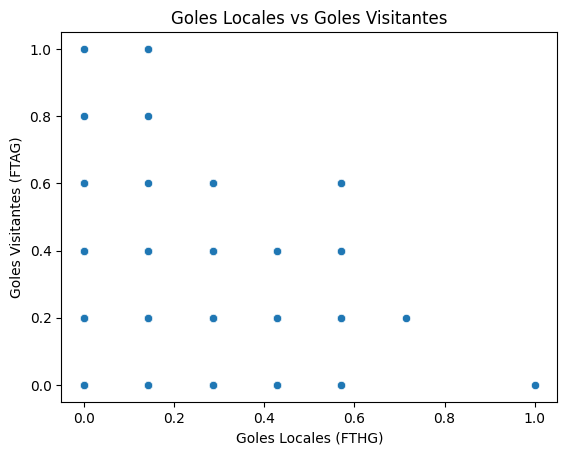

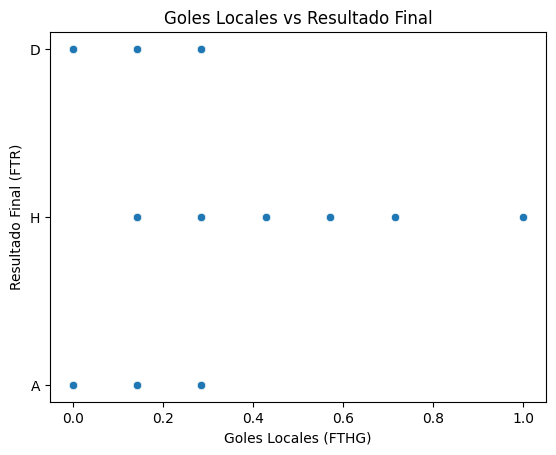

In [58]:
# Scatter plot para goles locales vs goles visitantes
sns.scatterplot(x=data['FTHG'], y=data['FTAG'])
plt.title("Goles Locales vs Goles Visitantes")
plt.xlabel('Goles Locales (FTHG)')
plt.ylabel('Goles Visitantes (FTAG)')
plt.show()

# Scatter plot para goles locales vs resultado final
sns.scatterplot(x=data['FTHG'], y=data['FTR'])
plt.title("Goles Locales vs Resultado Final")
plt.xlabel('Goles Locales (FTHG)')
plt.ylabel('Resultado Final (FTR)')
plt.show()


6. Análisis Multivariante
6.1 Heatmap de Correlación
El heatmap muestra la relación entre todas las variables numéricas en el dataset.

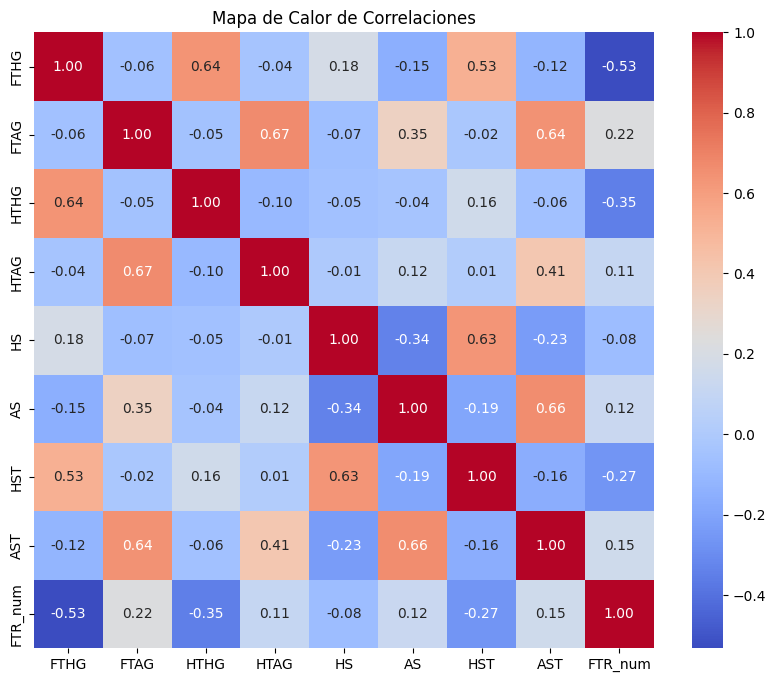

In [60]:
# Convertir la columna 'FTR' de categórica a numérica
data['FTR_num'] = data['FTR'].map({'H': 1, 'A': 2, 'D': 3})

# Incluir la nueva columna en el análisis de correlación
numeric_data_with_ftr = data[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'FTR_num']]

# Correlación entre las variables numéricas
correlation_matrix = numeric_data_with_ftr.corr()

# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


6.2 Pairplot
El pairplot muestra las relaciones entre todas las variables numéricas de manera gráfica, lo que puede ayudar a observar las relaciones multivariantes.

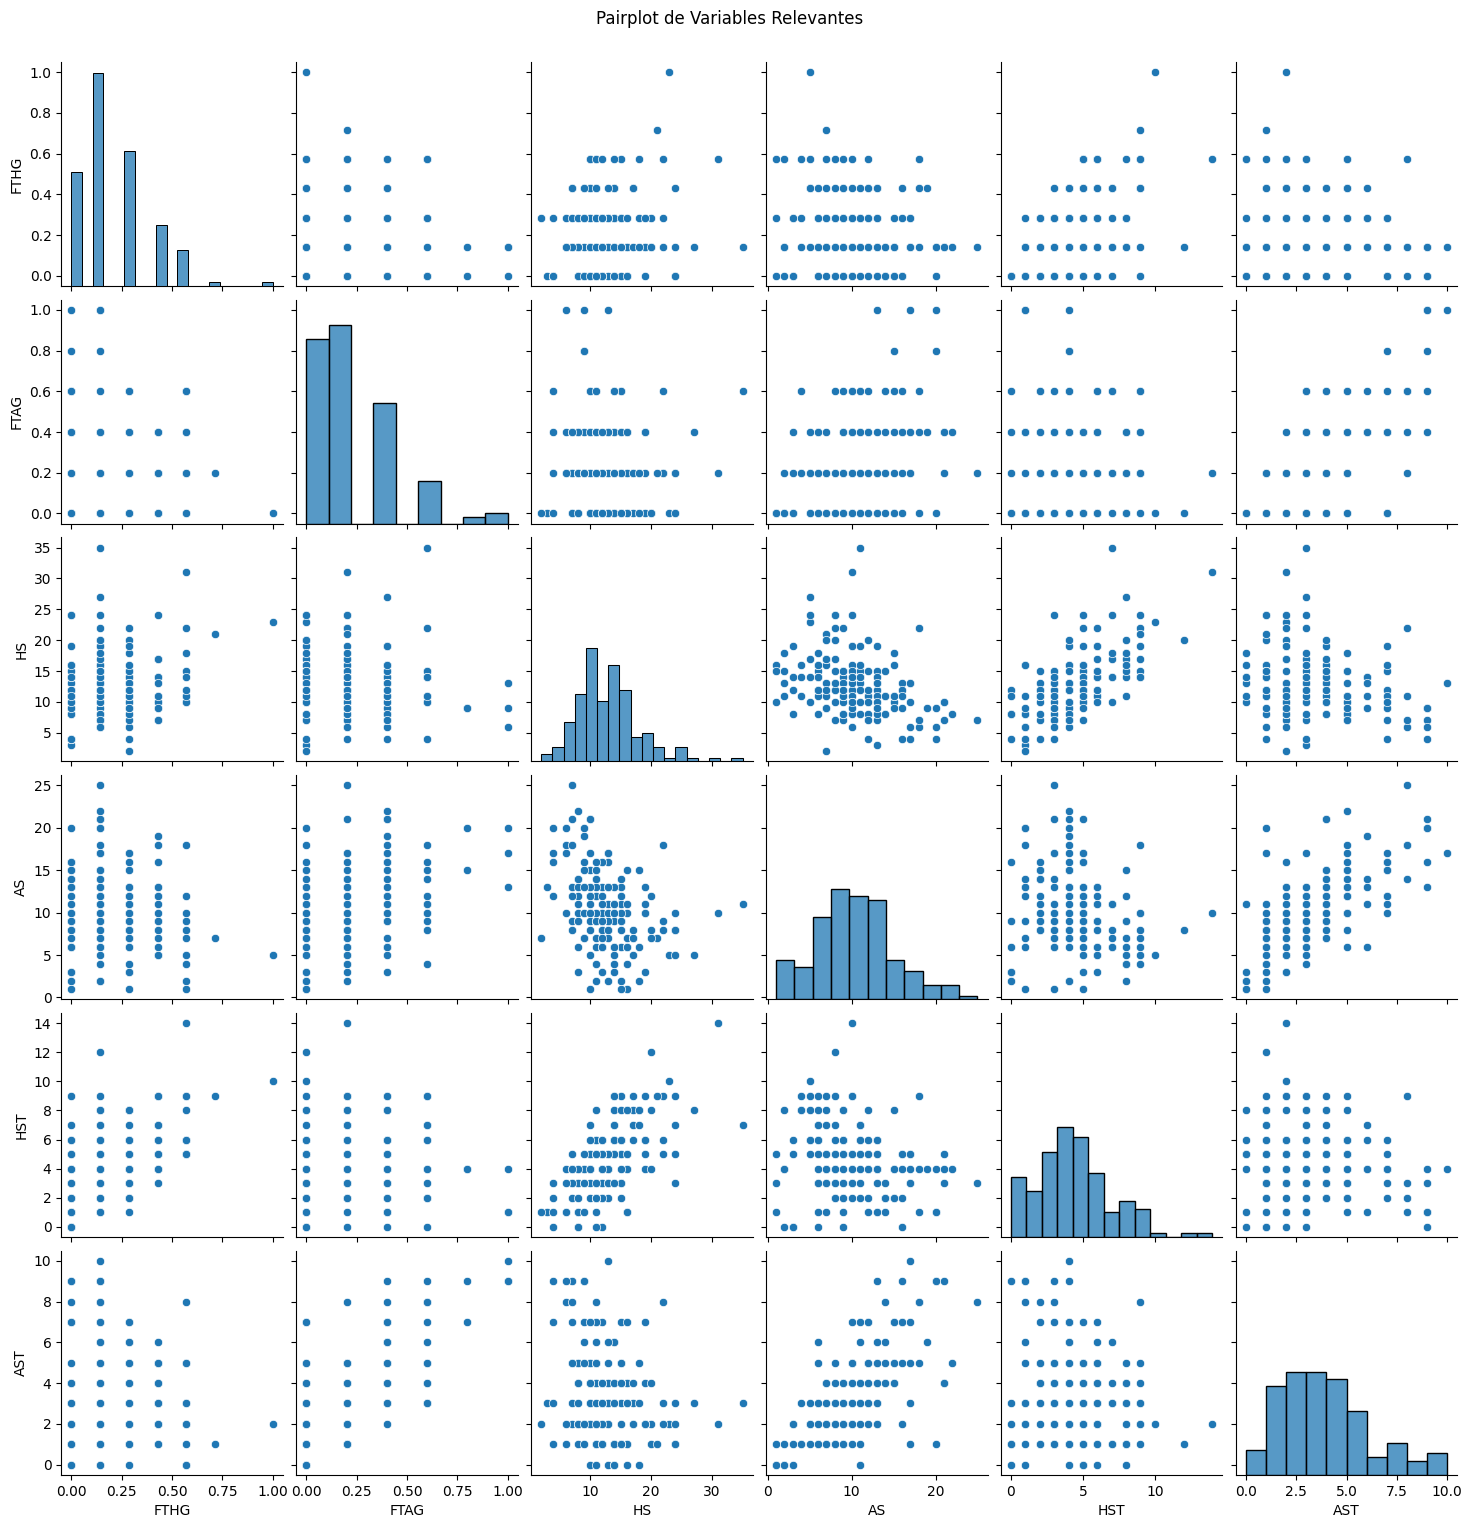

In [62]:
# Pairplot de las variables más relevantes
sns.pairplot(data[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST']])
plt.suptitle("Pairplot de Variables Relevantes", y=1.02)
plt.show()


7. Análisis de los Equipos de Fútbol
Para incluir los nombres de los equipos de fútbol, podemos extraer los nombres de HomeTeam y AwayTeam y ver qué equipos tienen el mejor rendimient

In [63]:
# Ver los equipos que tienen la media de goles más alta
home_team_performance = data.groupby('HomeTeam')['FTHG'].mean().sort_values(ascending=False)
away_team_performance = data.groupby('AwayTeam')['FTAG'].mean().sort_values(ascending=False)

print("Mejores equipos locales por media de goles:")
print(home_team_performance.head())

print("Mejores equipos visitantes por media de goles:")
print(away_team_performance.head())


Mejores equipos locales por media de goles:
HomeTeam
Barcelona      0.452381
Real Madrid    0.357143
Villarreal     0.326531
Ath Madrid     0.321429
Osasuna        0.269841
Name: FTHG, dtype: float64
Mejores equipos visitantes por media de goles:
AwayTeam
Barcelona      0.563636
Real Madrid    0.350000
Ath Madrid     0.300000
Ath Bilbao     0.285714
Celta          0.285714
Name: FTAG, dtype: float64


In [89]:
data = pd.read_csv(r"C:\Users\angel\OneDrive\Documentos\DATA_SCIENCE\Bootcamp\EDA_Pronosticos\SRC\data\SP1.csv")

Resumen
Análisis univariante: Descripción y visualización de la distribución de variables como FTHG (goles del equipo local) y FTAG (goles del equipo visitante).
Análisis bivariante: Relación entre goles locales y goles visitantes, y análisis de resultados finales.
Análisis multivariante: Análisis de la correlación entre múltiples variables y relaciones entre ellas mediante el heatmap y el pairplot

EquipoConMásGoles
Team A             2
Team C             2
Empate en goles    1
Name: count, dtype: int64


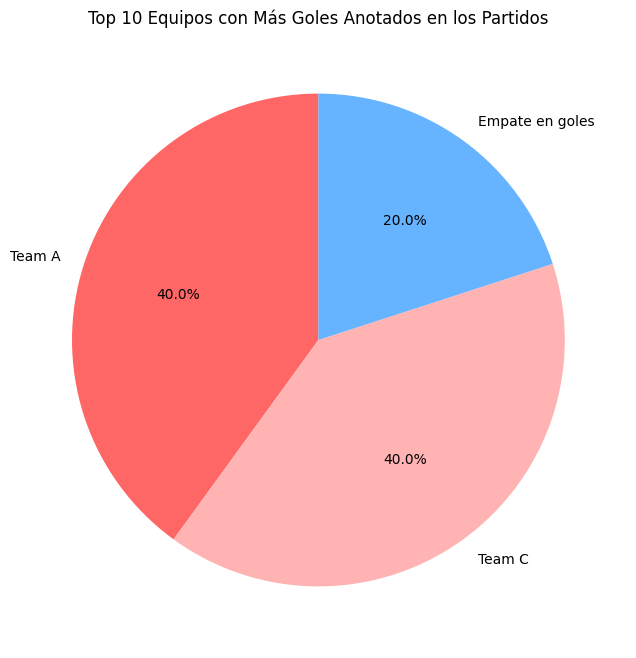

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo de DataFrame con datos ficticios (puedes usar tus datos reales)
data = {
    'HomeTeam': ['Team A', 'Team B', 'Team C', 'Team A', 'Team B'],
    'AwayTeam': ['Team D', 'Team C', 'Team B', 'Team C', 'Team A'],
    'FTHG': [2, 1, 3, 0, 2],  # Goles del equipo local
    'FTAG': [1, 2, 1, 0, 3]   # Goles del equipo visitante
}
df = pd.DataFrame(data)

# Función para determinar qué equipo anotó más goles en cada partido
def equipo_con_mas_goles(row):
    if row['FTHG'] > row['FTAG']:  # Si el equipo local anotó más goles
        return row['HomeTeam']
    elif row['FTHG'] < row['FTAG']:  # Si el equipo visitante anotó más goles
        return row['AwayTeam']
    else:
        return 'Empate en goles'  # En caso de empate de goles

# Aplicar la función para determinar qué equipo anotó más goles en cada partido
df['EquipoConMásGoles'] = df.apply(equipo_con_mas_goles, axis=1)

# Contar cuántas veces cada equipo ha anotado más goles
equipos_con_mas_goles = df['EquipoConMásGoles'].value_counts()

# Filtrar el Top 10 equipos con más goles (aunque si tienes menos de 10 equipos, ajustará automáticamente)
top_10_equipos_con_mas_goles = equipos_con_mas_goles.head(10)

# Mostrar el resultado
print(top_10_equipos_con_mas_goles)

# Crear el gráfico de pastel para mostrar el Top 10 de equipos con más goles
plt.figure(figsize=(8, 8))
top_10_equipos_con_mas_goles.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=top_10_equipos_con_mas_goles.index, colors=['#ff6666', '#ffb3b3', '#66b3ff', '#99ff99', '#ffcc99', '#ff9966', '#cc6699', '#ffb342', '#66b3b3', '#f5b342'])
plt.title('Top 10 Equipos con Más Goles Anotados en los Partidos')
plt.ylabel('')  # Eliminar la etiqueta del eje Y
plt.show()






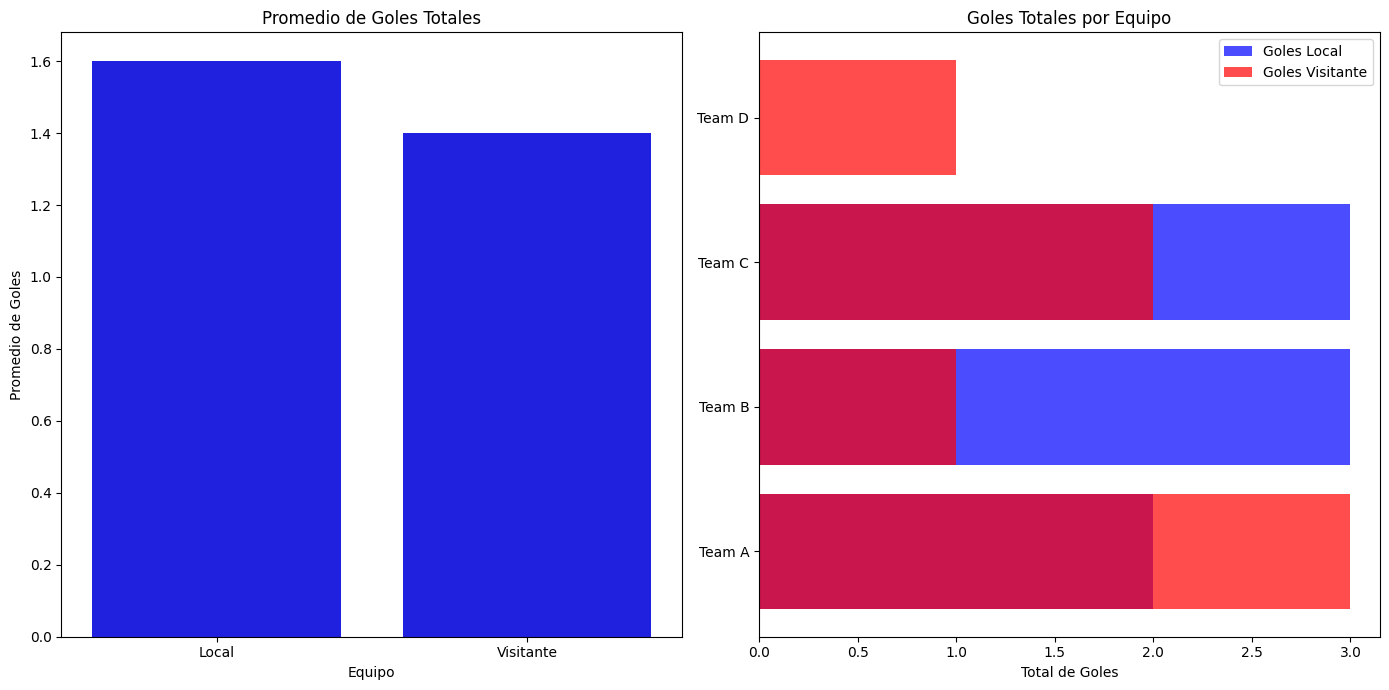

Correlación entre goles locales y goles visitantes: 0.35


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creación de columnas para las victorias locales y visitantes
df['victoria_local'] = df['FTHG'] > df['FTAG']  # Si el equipo local ganó
df['victoria_visitante'] = df['FTAG'] > df['FTHG']  # Si el equipo visitante ganó

# 1. Visualización de goles promedio por equipo (Local vs Visitante)
plt.figure(figsize=(14, 7))

# Gráfico de barras para los goles totales del equipo local vs visitante
plt.subplot(1, 2, 1)
sns.barplot(x=['Local', 'Visitante'], 
            y=[df['FTHG'].mean(), df['FTAG'].mean()], 
            color='blue')
plt.title('Promedio de Goles Totales')
plt.ylabel('Promedio de Goles')
plt.xlabel('Equipo')

# 2. Visualización de goles por equipo (total de goles, local vs visitante)

# Extraer los nombres de los equipos
equipos_locales = df['HomeTeam'].unique()
equipos_visitantes = df['AwayTeam'].unique()

# Preparar los datos para mostrar los goles totales por equipo
goles_local = [df[df['HomeTeam'] == equipo]['FTHG'].sum() for equipo in equipos_locales]
goles_visitante = [df[df['AwayTeam'] == equipo]['FTAG'].sum() for equipo in equipos_visitantes]

# Graficar la cantidad de goles por equipo
plt.subplot(1, 2, 2)
plt.barh(equipos_locales, goles_local, color='blue', label='Goles Local', alpha=0.7)
plt.barh(equipos_visitantes, goles_visitante, color='red', label='Goles Visitante', alpha=0.7)

plt.xlabel('Total de Goles')
plt.title('Goles Totales por Equipo')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Correlación entre goles locales y goles visitantes
correlacion_goles = df[['FTHG', 'FTAG']].corr().iloc[0, 1]

# Imprimir la correlación entre goles locales y goles visitantes
print(f"Correlación entre goles locales y goles visitantes: {correlacion_goles:.2f}")

